In [1]:
#%pip install scikit-learn
#!pip install nltk

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Text processing
import nltk
import string
import re

import warnings

warnings.filterwarnings('ignore')


In [3]:
%pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel("Group1-Copy1.xlsx", index_col = 0)
df

,ReceiverID,ActionType,NegoOutcome,Content
SenderID,,,,
70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."


In [5]:
df.isnull().sum()

ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [6]:
#Anzhal der Zeichen

df['Length'] = df['Content'].str.len()
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length
SenderID,,,,,
70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nVisiting Slovenia would be l...",1759
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nGreat, we are already looki...",1105
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your message ...",413
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nUnfortunately I have a bit o...",935


In [7]:
#WordCount

def word_count(content):
    content_list = content.split()
    return len(content_list)

df['Word count of nego message'] = df['Content'].apply(word_count)

df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message
SenderID,,,,,,
70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nVisiting Slovenia would be l...",1759,296
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nGreat, we are already looki...",1105,196
70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your message ...",413,78
69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nUnfortunately I have a bit o...",935,157


In [8]:
df['NegoOutcome'].value_counts()

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

In [9]:
accepted_messages = df[df['NegoOutcome']=='FinalAccept']['Content']
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [10]:
rejected_messages = df[df['NegoOutcome']=='FinalReject']['Content']
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [11]:
from sklearn import preprocessing

df['NegoOutcomeLabel'] = df.NegoOutcome.map({'FinalReject': 0, 'FinalAccept': 1})
df.head()
df.tail()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest...",1755,338,0
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you...",1460,263,0
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans...",673,133,0
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ...",969,171,0
851,856,FinalReject,FinalReject,"Dear Chris Meyer,\n \nI'm so sorry but I can n...",276,54,0


In [12]:
#%pip install wordcloud

Text(0.5, 1.0, 'Rejected Messages')

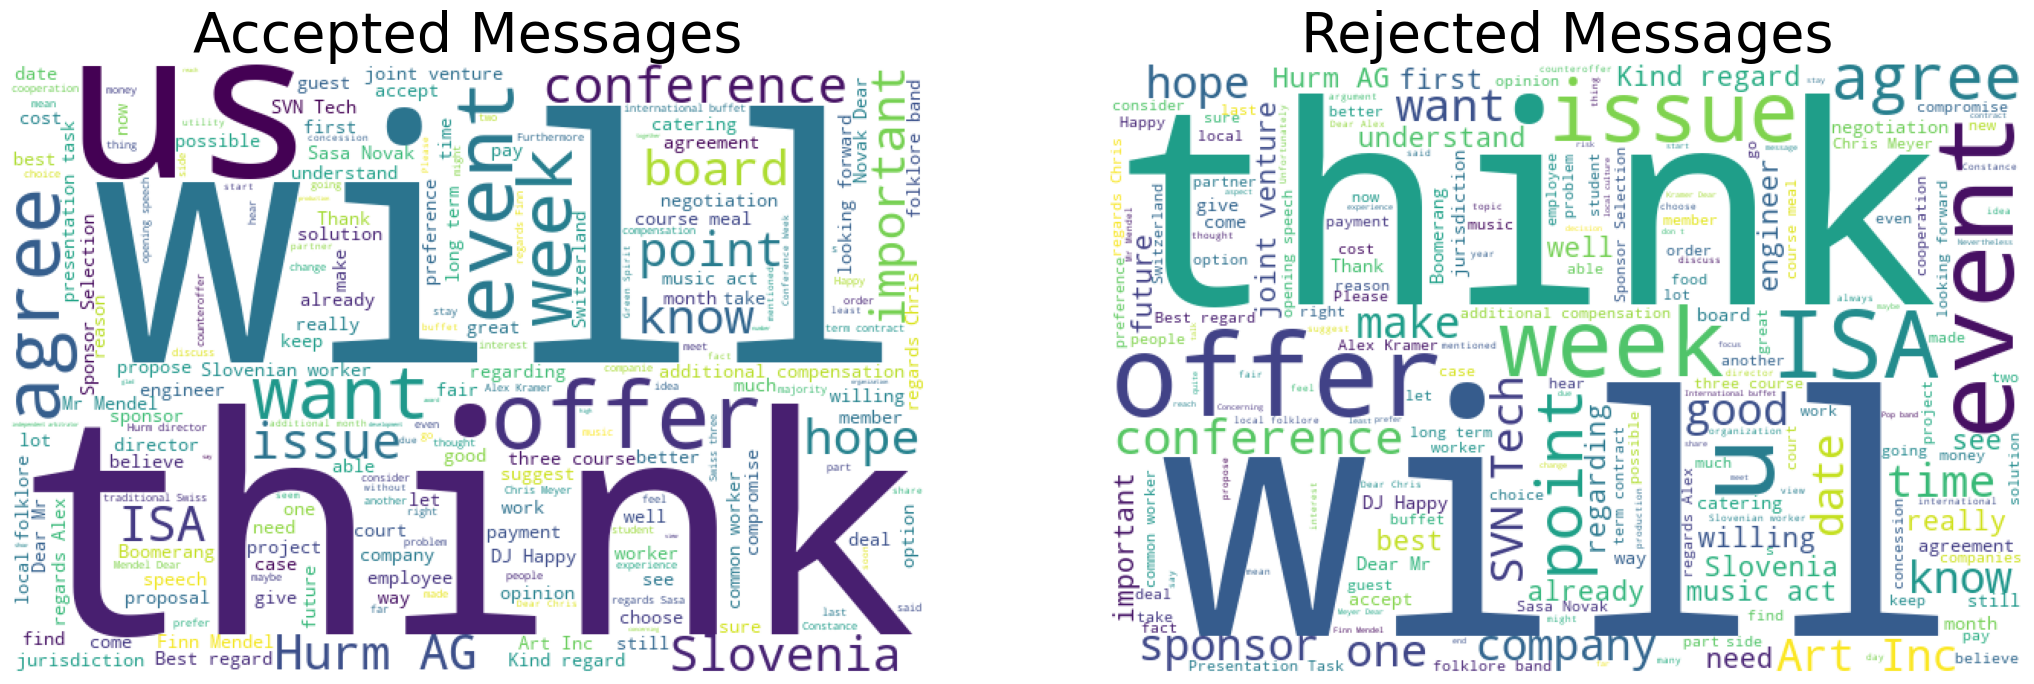

In [13]:
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[26,8])

wordcloud1 = WordCloud(background_color = 'white', width=600, 
                       height= 400).generate(" ".join(accepted_messages))

ax1.imshow(wordcloud1)
ax1.axis("off")
ax1.set_title('Accepted Messages', fontsize= 40)

wordcloud2 = WordCloud(background_color = 'white', width=600, 
                       height= 400).generate(" ".join(rejected_messages))

ax2.imshow(wordcloud2)
ax2.axis("off")
ax2.set_title('Rejected Messages', fontsize= 40)

In [14]:
# Compare average word count between outcomes
accepted_word_count = df[df['NegoOutcome'] == 'FinalAccept']['Word count of nego message']
rejected_word_count = df[df['NegoOutcome'] == 'FinalReject']['Word count of nego message']

print("Average Word Count - Accepted:", accepted_word_count.mean())
print("Average Word Count - Rejected:", rejected_word_count.mean())


Average Word Count - Accepted: 219.2568578553616
Average Word Count - Rejected: 256.50274725274727


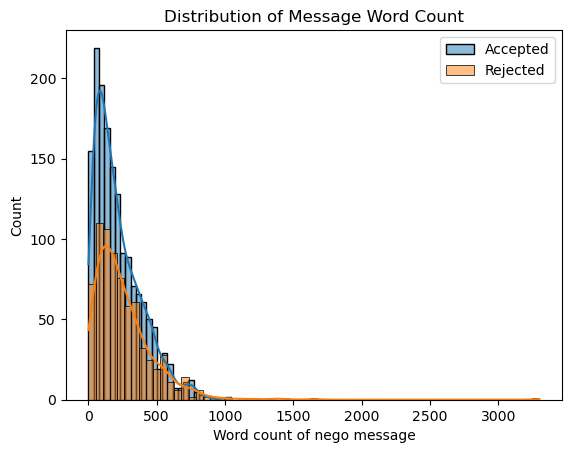

In [15]:
sns.histplot(accepted_word_count, label='Accepted', kde=True, alpha=0.5)
sns.histplot(rejected_word_count, label='Rejected', kde=True, alpha=0.5)
plt.legend()
plt.title("Distribution of Message Word Count")
plt.show()


In [16]:
#%pip install TextBlob

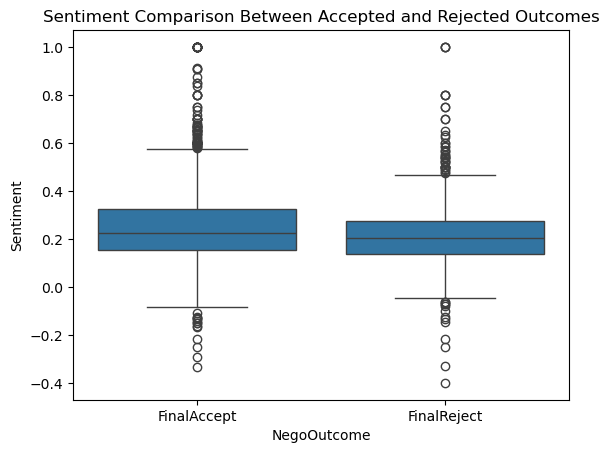

In [17]:
from textblob import TextBlob

df['Sentiment'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.boxplot(x='NegoOutcome', y='Sentiment', data=df)
plt.title('Sentiment Comparison Between Accepted and Rejected Outcomes')
plt.show()


In [18]:
all_messages = df['Content']
all_messages

SenderID
70     Dear Mr. Mendel, \nHope you are doing well! \n...
69     Dear Mr. Novak, \nThank you for reaching out t...
70     Dear Mr. Mendel, \nThank your kind response – ...
69     Dear Mr. Novak, \nThank you for your swift rep...
70     Dear Mr. Mendel, \nThank you for your proposal...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2332, dtype: object

In [19]:
def clean_text(message):
    #lowercasing
    message = message.lower()
    
    #regular expressions, gerne mal nachschauen wie das funktioniert
    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    
    return message

In [20]:
df['Content'] = df['Content'].apply(lambda x: clean_text(x))
df['Content'].head()

SenderID
70    dear mr mendel hope you are doing well as the ...
69    dear mr novak thank you for reaching out to me...
70    dear mr mendel thank your kind response – no n...
69    dear mr novak thank you for your swift reply i...
70    dear mr mendel thank you for your proposal and...
Name: Content, dtype: object

In [21]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['Content'] = df['Content'].apply(lambda x:tokenizer.tokenize(x))
df['Content'].head()

SenderID
70    [dear, mr, mendel, hope, you, are, doing, well...
69    [dear, mr, novak, thank, you, for, reaching, o...
70    [dear, mr, mendel, thank, your, kind, response...
69    [dear, mr, novak, thank, you, for, your, swift...
70    [dear, mr, mendel, thank, you, for, your, prop...
Name: Content, dtype: object

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    words= [w for w in text if w not in stopwords.words('english')]
    return words
    
df['Content'] = df['Content'].apply(lambda x:remove_stopwords(x))
df['Content'].head()

SenderID
70    [dear, mr, mendel, hope, well, management, com...
69    [dear, mr, novak, thank, reaching, mei, apolog...
70    [dear, mr, mendel, thank, kind, response, need...
69    [dear, mr, novak, thank, swift, reply, read, s...
70    [dear, mr, mendel, thank, proposal, efforts, f...
Name: Content, dtype: object

In [24]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x: combine_text(x))
df['Content']

SenderID
70     dear mr mendel hope well management companies ...
69     dear mr novak thank reaching mei apologize sli...
70     dear mr mendel thank kind response need hurry ...
69     dear mr novak thank swift reply read second se...
70     dear mr mendel thank proposal efforts far seem...
                             ...                        
851    dear chis meyer thank latest offer points comp...
856    dear alex kramerthank much latest offer happy ...
851    dear chris meyerthank fast answer happy found ...
856    dear alex krameri still interested coming join...
851    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2332, dtype: object

In [27]:
corpus =[]
new = df['Content'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
corpus

['dear',
 'mr',
 'mendel',
 'hope',
 'well',
 'management',
 'companies',
 'agreed',
 'building',
 'fruitful',
 'partnership',
 'face',
 'upcoming',
 'disruptions',
 'market',
 'best',
 'innovation',
 'green',
 'spirit',
 'would',
 'like',
 'introduce',
 'sasa',
 'novak',
 'reaching',
 'tighten',
 'general',
 'terms',
 'hurm',
 'ag',
 'svn',
 'tech',
 'established',
 'first',
 'round',
 'discussions',
 'far',
 'please',
 'find',
 'attached',
 'proposal',
 'open',
 'issues',
 'joint',
 'venture',
 'would',
 'like',
 'explain',
 'following',
 'directors',
 'first',
 'would',
 'like',
 'address',
 'unsolved',
 'issue',
 'number',
 'directors',
 'sent',
 'hurm',
 'ag',
 'svn',
 'tech',
 'since',
 'agreed',
 'decisionmaking',
 'committee',
 'consisting',
 'members',
 'simple',
 'majority',
 'power',
 'strongly',
 'suggest',
 'dividing',
 'seats',
 'svn',
 'tech',
 'would',
 'able',
 'deal',
 'local',
 'authorities',
 'partners',
 'successfully',
 'using',
 'strong',
 'local',
 'network',
 '

In [28]:
len(corpus)

260597

# BOW

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vectorizer = CountVectorizer()
message_vector = count_vectorizer.fit_transform(df['Content'])
message_vector

<2332x9812 sparse matrix of type '<class 'numpy.int64'>'
	with 195919 stored elements in Compressed Sparse Row format>

In [32]:
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data=message_array, columns=count_vectorizer.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [33]:
df_countvectorizer.columns

Index(['abandon', 'abandoned', 'abandoning', 'abdicate', 'aber', 'abiding',
       'abilities', 'ability', 'abilty', 'able',
       ...
       'zürich', 'áfter', 'ánd', 'ítems', 'óf', 'última', 'ülan', 'šimi',
       'šimic', 'μr'],
      dtype='object', length=9812)

In [34]:
count_vectorizer_ngrams = CountVectorizer(ngram_range=(1,2), min_df = 0.01, max_df=0.7, max_features=100)
message_vectors_ngrams= count_vectorizer_ngrams.fit_transform(df['Content'])

In [35]:
message_ngrams_array = message_vectors_ngrams.toarray()
df_countvectorizer_ngrams = pd.DataFrame(data=message_ngrams_array, columns = count_vectorizer_ngrams.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Content'])
tfidf_message_vector= tfidf_vectorizer.transform(df['Content'])

tfidf_message_vector.shape

(2332, 9812)

In [37]:
message_tfidf_array = tfidf_message_vector.toarray()
df_tfidf = pd.DataFrame(data=message_tfidf_array, columns= tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

      abandon  abandoned  abandoning  abdicate  aber  abiding  abilities  \
0         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
1         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
3         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
4         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
...       ...        ...         ...       ...   ...      ...        ...   
2327      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2328      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2329      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2330      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2331      0.0        0.0         0.0       0.0   0.0      0.0        0.0   

      ability  abilty      able  ...    zürich  áfter  ánd  ítems   óf  \
0         0.0

In [38]:
#%pip install scipy==1.12

Word Embedding mit Glove

# Versuch mit Glove
Pretrained Glove

In [41]:
# Install gensim for pretrained GloVe embeddings
#!pip install gensim
#It focuses on global word co-occurrence statistics, which means it captures how often words appear together in the same context across an entire corpus.
#Similar words (e.g., king and queen) have embeddings (vectors) that are close to each other in the vector space.
#word embedding technique, not a bag-of-words method. It creates dense vector representations of words that capture 
#semantic meaning and relationships.

In [42]:
import gensim.downloader as api  # To load pretrained GloVe embeddings
import pandas as pd
import numpy as np

In [43]:
# Downloading and loading pretrained GloVe embeddings
# Dimensionality (100-dimensional embeddings)
glove_model = api.load("glove-wiki-gigaword-100")  # Options: 50, 100, 200, 300 Testing with 100

# Print a sample word embedding
print(glove_model['negotiation'])


[-0.023566  -0.28326   -0.11461    0.71741   -0.52878   -0.61264
  0.34418    0.013459   0.33007   -0.19974    0.47806    0.10249
  0.87942   -0.12501   -0.21185    0.09105   -0.72754   -0.23456
 -0.08657   -0.6022    -0.20408    0.091489  -0.17364   -0.53197
  0.10374   -0.10677    0.065824  -0.28555   -0.26143   -0.56023
 -1.2523     0.095917   0.053514  -0.60153    0.47238    0.29847
  0.061921  -0.63153    0.16292   -0.77674   -0.62589   -0.028247
  0.3849    -0.12315   -0.70743   -0.63185   -0.49232    0.0037925
 -0.16448    0.030472   0.058827  -0.0084547 -0.59597    1.0577
  0.27584   -1.0869     0.020058  -0.56214    0.61056    0.47549
 -0.62464   -0.27904   -0.59627   -0.59679    0.5589    -0.039583
  0.039277   0.43853   -0.10758   -0.778      0.28015   -0.47566
  0.27214   -0.50856   -0.11679    0.24685   -0.91272   -0.51724
 -1.2031    -0.21802    0.2639     0.5568     0.48627    0.042529
 -1.0337     1.2108     0.25717    0.45926    0.51008   -0.85933
 -0.38921    0.21701 

In [44]:
#The model is now ready for use. Each word has a 100-dimensional vector.

In [45]:
# Function to generate an average embedding for a sentence/document
def get_glove_embeddings(text, model):
    """
    Convert a text (sentence) into an average GloVe embedding.
    - text: str, the input text.
    - model: gensim GloVe model.
    
    Returns: A numpy array of the average embedding.
    """
    words = text.split()  # Split the sentence into words
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average the word embeddings for the sentence
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found


In [46]:
# Load dataset
df

# Embedding function to the 'Content' column
df['Embedding'] = df['Content'].apply(lambda x: get_glove_embeddings(x, glove_model))

# Sample of the new embeddings column
df[['Content', 'Embedding']].head()


,Content,Embedding
SenderID,,
70,dear mr mendel hope well management companies ...,"[-0.047684535, 0.16819397, 0.19428127, 0.08028..."
69,dear mr novak thank reaching mei apologize sli...,"[0.027389104, 0.12331005, 0.14619257, 0.066418..."
70,dear mr mendel thank kind response need hurry ...,"[-0.018333392, 0.19379123, 0.20832126, -0.0134..."
69,dear mr novak thank swift reply read second se...,"[-0.020107131, 0.101761475, 0.1933178, 0.08544..."
70,dear mr mendel thank proposal efforts far seem...,"[-0.03138311, 0.128805, 0.22083217, 0.02599405..."


In [47]:
# Map 'FinalReject' to 0 and 'FinalAccept' to 1
df['NegoOutcomeLabel'] = df['NegoOutcome'].map({'FinalReject': 0, 'FinalAccept': 1})

# Verify the mapping
print(df['NegoOutcomeLabel'].value_counts())

print(df.columns)


NegoOutcomeLabel
1    1604
0     728
Name: count, dtype: int64
Index(['ReceiverID', 'ActionType', 'NegoOutcome', 'Content', 'Length',
       'Word count of nego message', 'NegoOutcomeLabel', 'Sentiment',
       'Embedding'],
      dtype='object')


In [48]:
# Separate features (embeddings) and target labels
X = np.stack(df['Embedding'].values)  # Convert list of embeddings to a NumPy array
y = df['NegoOutcomeLabel'].values  # Assuming this column contains the binary outcome labels (0 = Reject, 1 = Accept)

# Check the shapes of the feature matrix and target vector
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (2332, 100)
Target vector shape: (2332,)
